In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./2330TW_5years_data.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Increase
0,2020/1/2,300.494387,306.368713,300.494387,306.368713,31754120,2.42%
1,2020/1/3,310.887459,311.791202,303.205647,306.820618,41811268,0.15%
2,2020/1/6,300.946345,302.301960,300.042602,300.042602,45343057,-2.21%
3,2020/1/7,300.494370,300.946241,295.071915,297.783142,50879181,-0.75%
4,2020/1/8,293.716301,300.946241,293.716301,297.783142,37567748,0.00%


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1312 non-null   object 
 1   Open      1312 non-null   float64
 2   High      1312 non-null   float64
 3   Low       1312 non-null   float64
 4   Close     1312 non-null   float64
 5   Volume    1312 non-null   int64  
 6   Increase  1312 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 71.9+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,1312.000000,1312.000000,1312.000000,1312.000000,1.312000e+03
mean,593.866496,598.306654,588.984074,593.565137,3.655794e+07
std,219.055371,221.140018,217.224022,219.074379,2.095293e+07
min,229.954220,230.866737,214.897694,226.304153,0.000000e+00
25%,471.822735,474.327252,467.060705,470.205010,2.263582e+07
50%,547.761550,550.845745,543.604233,547.761627,3.201600e+07
75%,620.907562,624.292076,614.732116,619.785767,4.346142e+07
max,1144.664906,1154.618514,1129.734497,1129.734497,1.663077e+08


##### 請以 J.W. Tukey 在1977年於Exploratory data analysis 所發表的方式，計算 上面 2330TW_5years_data.csv 欄位的離群值，並繪製盒鬚圖與常態分配圖。離群值請寫入outlier.csv 檔案，第一欄需有日期，最後一欄加註離群值的欄位名稱。

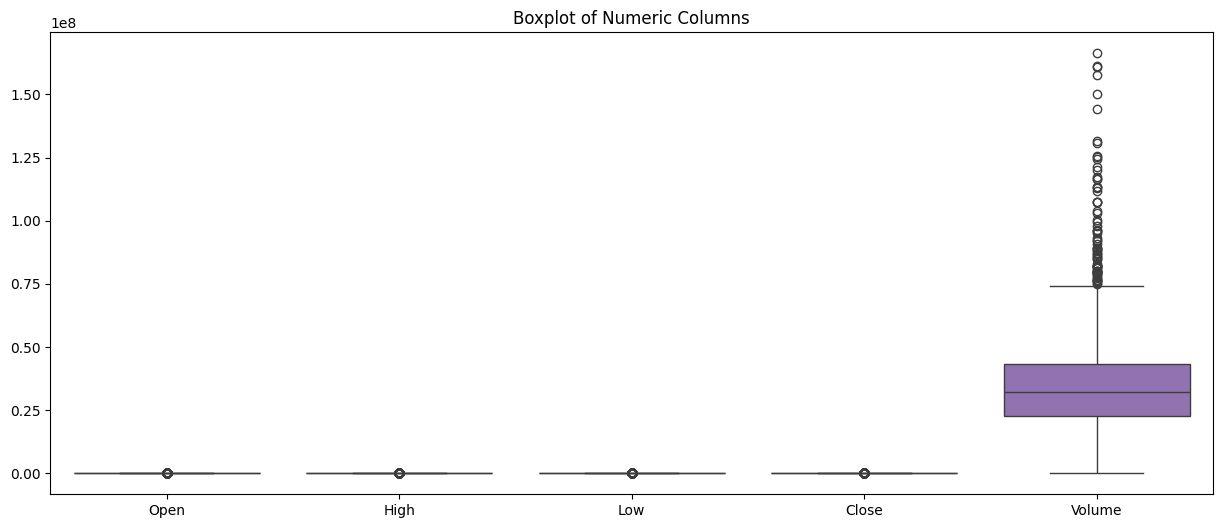

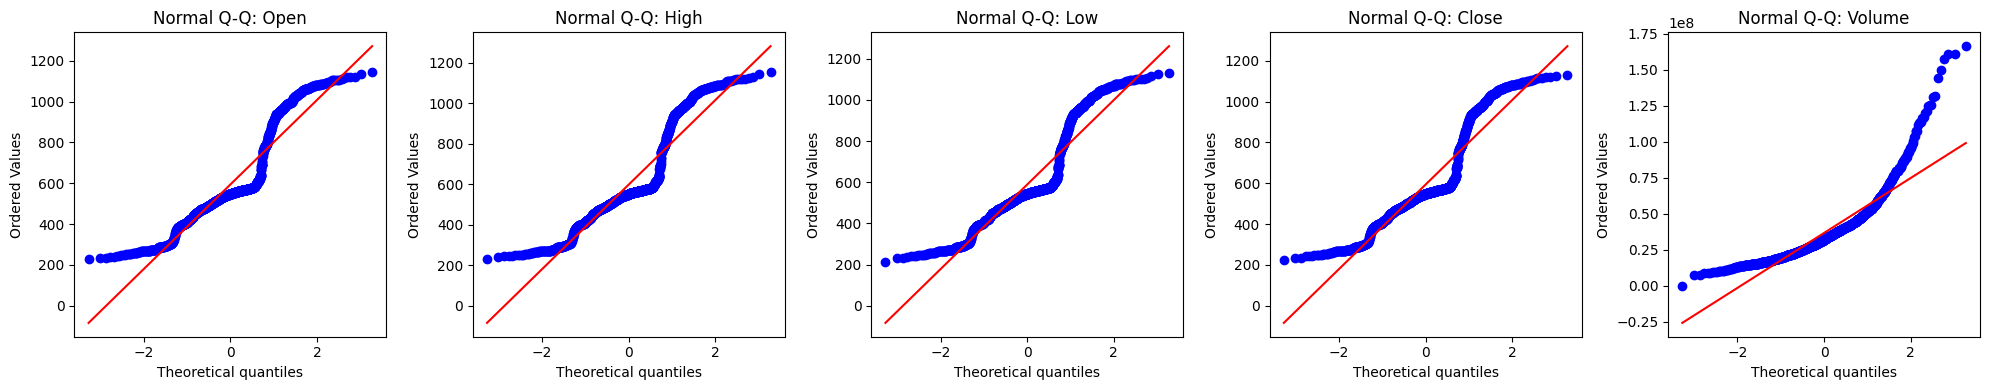

In [6]:
import numpy as np
import seaborn as sns
from scipy import stats

# 計算所有數值欄位的離群值，並收集離群資料
outlier_rows = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_df = df.loc[mask, ['Date'] + numeric_cols]
    outlier_df['Outlier_Column'] = col
    outlier_rows.append(outlier_df)

# 合併所有離群值資料
outlier_all = pd.concat(outlier_rows, ignore_index=True)
outlier_all.to_csv('outlier.csv', index=False)

# 繪製盒鬚圖
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot of Numeric Columns')
plt.show()

# 繪製常態分配圖 (Q-Q plot)
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(20, 4))
for i, col in enumerate(numeric_cols):
    stats.probplot(df[col], dist="norm", plot=axes[i])
    axes[i].set_title(f'Normal Q-Q: {col}')
plt.tight_layout()
plt.show()